# AML_Homework1
Shuyu Huang

uni: sh3967

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df_fire=pd.read_csv('./fire_nrt_V1_96617.csv')

# Task 1: Density Plots(50 points)
### 1.1 Plot the longitude vs latitude several ways within a single figure (each in its own axes):

Text(0, 0.5, 'latitude')

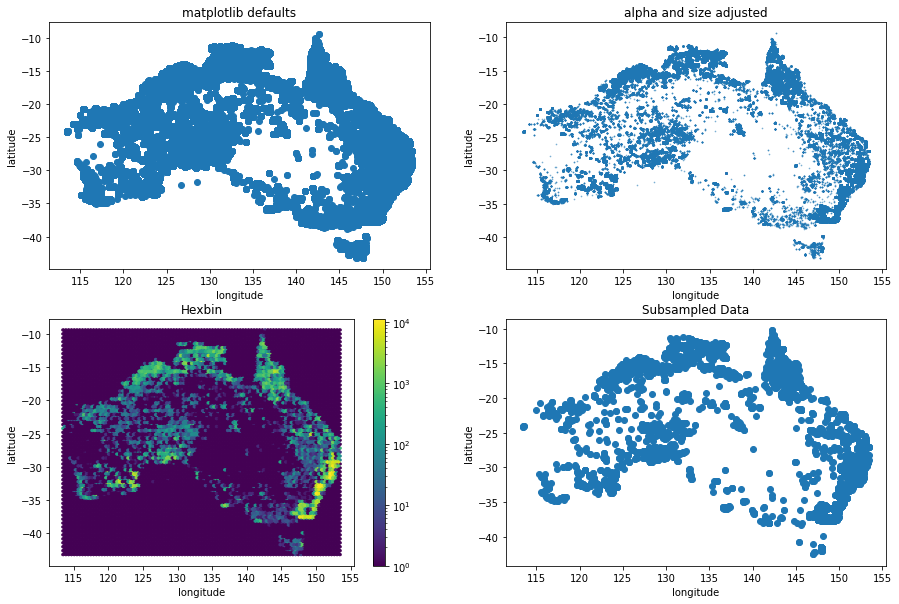

In [7]:
fire_x = df_fire.longitude
fire_y = df_fire.latitude
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].scatter(fire_x,fire_y)
ax[0,0].set_title('matplotlib defaults')
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')

ax[0,1].scatter(fire_x,fire_y, s=0.5, alpha=0.5)
ax[0,1].set_title('alpha and size adjusted')
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')

hexbin = ax[1,0].hexbin(fire_x, fire_y, bins = 'log')
fig.colorbar(hexbin, ax = ax[1,0]) 
ax[1,0].set_title("Hexbin") 
ax[1,0].set_xlabel("longitude") 
ax[1,0].set_ylabel("latitude")

fire_sample = df_fire.sample(10000)
sample_x=fire_sample.longitude
sample_y=fire_sample.latitude
ax[1,1].scatter(sample_x,sample_y)
ax[1,1].set_title('Subsampled Data')
ax[1,1].set_xlabel('longitude')
ax[1,1].set_ylabel('latitude')

### 1.2 In what areas are most of the anomalies (measurements) located? [5pts]

Observation:

According to plots in 1.1, from hexbin map, we could observe that area with yellowish color has more measurements. Therefore,  the areas in the south-east has the most measurement. [Longitude form 145 to 155, Latitude from -37 to -30].

The North Australia also has comparable anomalies located.

According to map with adjusted alpha and marker size, areas along coasts tend to have many measurements.

The other two maps are not so informative.

# Task 2: Visualizing class membership(50 points)

Text(0, 0.5, 'Frequency')

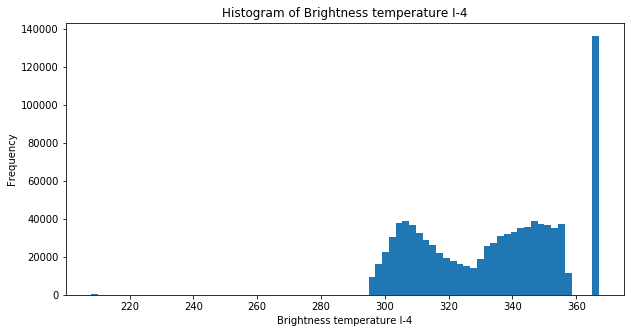

In [8]:
figg, axx = plt.subplots(1,1,figsize=(10,5))
axx.hist(df_fire.bright_ti4, bins = 75) 
axx.set_title('Histogram of Brightness temperature I-4') 
axx.set_xlabel('Brightness temperature I-4') 
axx.set_ylabel('Frequency') 

### 2.1 Plots of saturated and unsaturated

Text(0, 0.5, 'latitude')

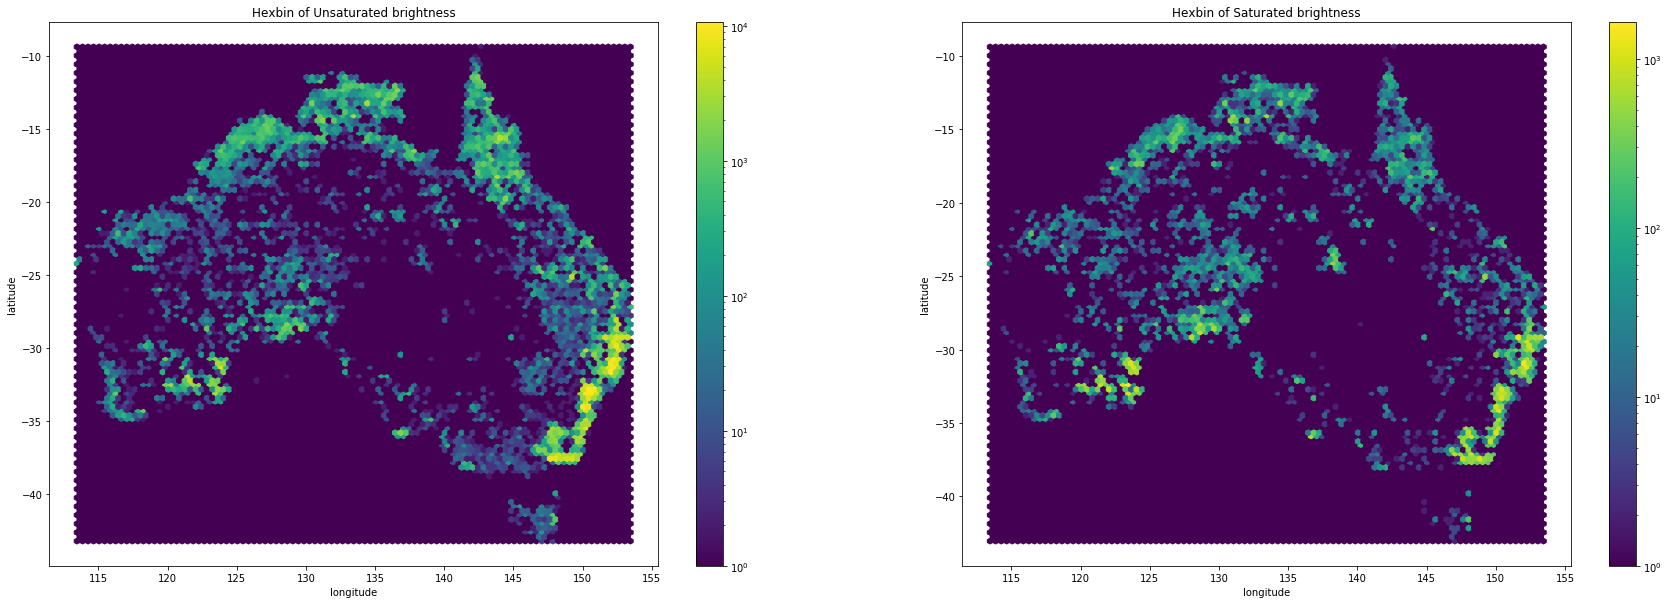

In [9]:
fig2, ax2 = plt.subplots(1,2,figsize=(30,10))
uns = df_fire[df_fire.bright_ti4 <360]
uns_x=uns.longitude
uns_y=uns.latitude
s = df_fire[df_fire.bright_ti4 >= 360]
s_x=s.longitude
s_y=s.latitude
hexbin1 = ax2[0].hexbin(uns_x, uns_y, bins = 'log')
fig.colorbar(hexbin1, ax = ax2[0]) 
hexbin2 = ax2[1].hexbin(s_x, s_y, bins = 'log')
fig.colorbar(hexbin2, ax = ax2[1]) 

ax2[0].set_title("Hexbin of Unsaturated brightness") 
ax2[0].set_xlabel("longitude") 
ax2[0].set_ylabel("latitude")

ax2[1].set_title("Hexbin of Saturated brightness") 
ax2[1].set_xlabel("longitude") 
ax2[1].set_ylabel("latitude")

I chose hexbin plot.

According to legends of colorbars of both hexbin plots, I could observe that there are more unsaturated Brightness temperature I-4 measurements.

Moreover, both saturated and unsaturated measurements share similar distributions in Australia.

### 2.2 Plot both groups in the same axes with different colors.

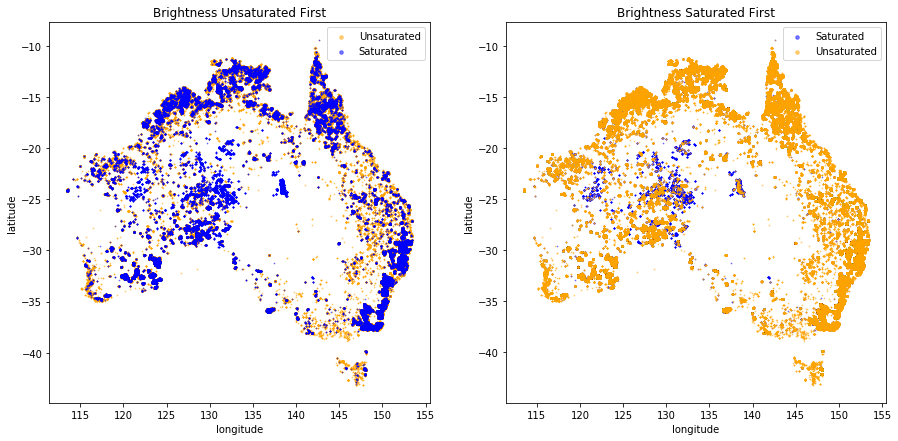

In [11]:
fig3, ax3 = plt.subplots(1,2,figsize = (15, 7))
ax3[0].scatter(uns_x,uns_y, s=0.5, alpha=0.5, label='Unsaturated', c='orange')
ax3[0].set_title('Brightness Unsaturated First')
ax3[0].scatter(s_x,s_y, s=0.5, alpha=0.5, label='Saturated',c='blue')
ax3[0].set_xlabel('longitude')
ax3[0].set_ylabel('latitude')
ax3[0].legend(loc = 'upper right', markerscale=5)

ax3[1].scatter(s_x,s_y, s=0.5, alpha=0.5, label='Saturated', c='blue')
ax3[1].set_title('Brightness Saturated First')
ax3[1].scatter(uns_x,uns_y, s=0.5, alpha=0.5, label='Unsaturated',c='orange')
ax3[1].set_xlabel('longitude')
ax3[1].set_ylabel('latitude')
ax3[1].legend(loc = 'upper right', markerscale=5)

Observation: 

The sequence of plotting matters. The dots drew later will cover the dots that previously drew. 

If we plot unsaturated measurements first and then saturated measurements, saturated anomalies will dominate the map. We would like to conclue there are much more saturated anomalies in Australia. 

Else if we plot unsaturated measurements later, the unsaturated measurements will dominates. We would easily think that unsaturated has much more data points.

So I think we need carefully use this method to present data. Or it would misguide audience's observartion. 

### 2.3 Better way to compare two distributions

Text(0.5, 1.0, 'Histogram of Latitude')

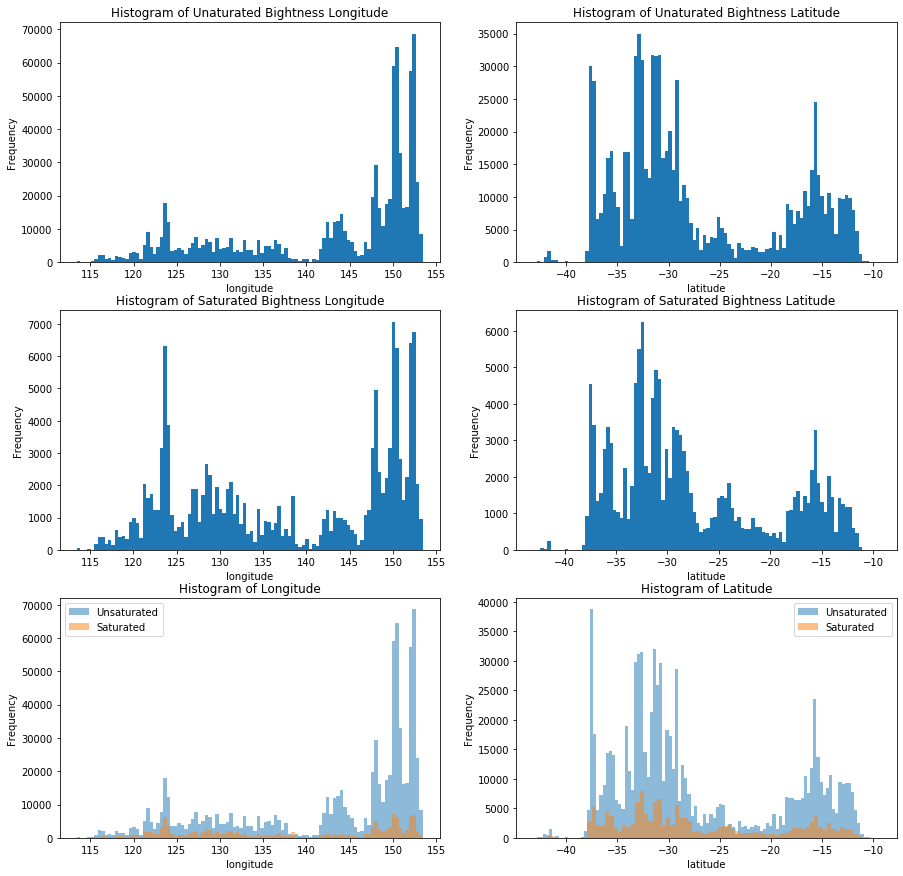

In [12]:
fig4, ax4 = plt.subplots(3,2,figsize=(15,15))
ax4[0,0].hist(uns_x, bins = 100) 
ax4[0,0].set_title('Histogram of Unaturated Bightness Longitude') 
ax4[0,0].set_xlabel('longitude') 
ax4[0,0].set_ylabel('Frequency') 

ax4[1,0].hist(s_x, bins = 100) 
ax4[1,0].set_title('Histogram of Saturated Bightness Longitude') 
ax4[1,0].set_ylabel('Frequency') 
ax4[1,0].set_xlabel('longitude') 

ax4[2,0].hist(uns_x,bins=100, label='Unsaturated',alpha=0.5)
ax4[2,0].hist(s_x,bins=100, label='Saturated',alpha=0.5)
ax4[2,0].legend(loc='best')
ax4[2,0].set_xlabel('longitude')
ax4[2,0].set_ylabel('Frequency')
ax4[2,0].set_title('Histogram of Longitude')

ax4[0,1].hist(uns_y, bins = 100) 
ax4[0,1].set_title('Histogram of Unaturated Bightness Latitude') 
ax4[0,1].set_xlabel('latitude') 
ax4[0,1].set_ylabel('Frequency') 

ax4[1,1].hist(s_y, bins = 100) 
ax4[1,1].set_title('Histogram of Saturated Bightness Latitude') 
ax4[1,1].set_xlabel('latitude') 
ax4[1,1].set_ylabel('Frequency')

ax4[2,1].hist(uns_y, bins='auto', alpha=0.5,label='Unsaturated')
ax4[2,1].hist(s_y, bins='auto', alpha=0.5,label='Saturated')
ax4[2,1].legend(loc='best')
ax4[2,1].set_xlabel('latitude')
ax4[2,1].set_ylabel('Frequency')
ax4[2,1].set_title('Histogram of Latitude')

I decide to use histograms to visualize frequency distributions. I produces six histograms.

By managing sequences of histograms, I made the histograms in each column share identical x-axis for comparing. 

The  three histograms to the left describes the distribution of longitude of brightness measurements. Comparing first two histograms, logitude greater than 140 of both saturated and unsaturated seems to have similar distributions. However, for logitude less than 140, saturated measurement tends to exhibit a kernel shape distribution while unsaturated measurement tends to have uniform distribution. Overall, longitude of unsaturated measurements is right-skewed; longitude of saturated measurements has two peaks instead.

The three histograms to the right describes the distribution of latitude of brightness measurements. Comparing first two histograms, the distributions are quite similar. Both of them has two peaks and most of latitude of measurements gathered between -37 to -27.

The two histograms at the bottom depict histograms of saturated and unsaturated measurements in one graph. We could observe that the number of unsaturated anomalies is much more than that of saturated data. For longitude, our observation is corrected because for longitude below 140, their distributions are similar. The reason why we observe extraordinary peaks for saturated measurements could be explained by relative frequency of data. For Latitude, our observation that unsaturated and saturated measurements have similar distributions was proved again. 

In a nut shell, distributions of unsaturated and saturated anomalies are similar.